<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/code/handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/datasets'

**How to handle missing values?**
* Deletion of missing data :
    * Remove complete row or the part which contains missing values. Suitable for cases when small amount of data is missing.
    * Column deletion : Remove whole column in case a lot of values are missing for a particular column as they would produce incosistent results.

* Imputation or Replacement
    * Mean, Median or Mode imputation : Replacing missing values with the mean, median or mode.
    * Regression imputation : Predict the missing values uisng regresssion, this is done mostly in cases when we have data which is not comparable.
    * KNN, multiple imputation : Using knn or by generation of multiple datasets.

In [2]:
#@title Working on Placement Data
data_url = 'https://raw.githubusercontent.com/krahul2024/machine-learning/main/data/Placement_Dataset.csv'
placement_data = pd.read_csv(data_url)

Finding count of total null values for each of the columns

In [ ]:
placement_data.isnull().sum()  # this gives total no. of missing values in each column

In this dataset about 67 of total 215 rows have missing salary values , so in this case deletion of rows is not an efficient way as it is way too much.
In this case we will use imputation.
Here we can use central tendencies for imputation.
Mean, Median, Mode

Analysis of the distribution of data , as we can't just impute missing values with mean , median or mode. First we need to analyse the data and then according to that select the method to use

In [ ]:
sns.displot(placement_data['salary'])

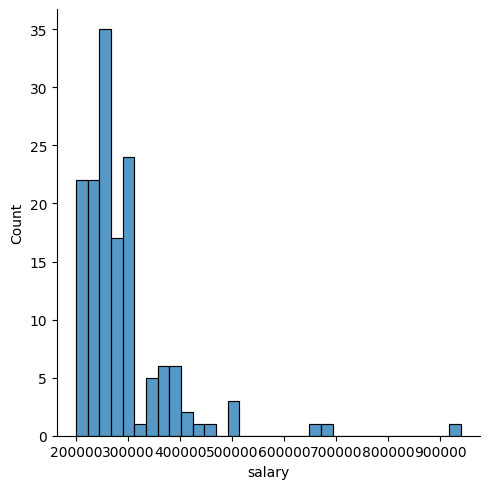


This is distribution of salary , in tihs case we can't use mean to replace missing values,  reason is most of  the data lying on the left side, so here we will be using either median or mode .

In [ ]:
# using median to replace the missing values
placement_data['salary'].fillna(placement_data['salary'].median(), inplace = True)
placement_data.isnull().sum() # now there are no missing values

Creating an instance and filling with mean values

In [6]:
# filling missing values with mean values
place_data = placement_data
place_data['salary'].fillna(place_data['salary'].median(), inplace = True)

#Data Standardization

In [67]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets

Using Breast Cancer dataset

In [68]:
cancer_dataset = sklearn.datasets.load_breast_cancer()
# loading this dataset to pandas dataframe
cancer_data = pd.DataFrame(cancer_dataset.data, columns = cancer_dataset.feature_names)
# as this dataframe doesn't include target so we have to store this somewhere as this is result
X = cancer_data
Y = cancer_dataset.target

We need to split the data in training data and testing data before standardization.

In [69]:
''' X - data without the target or price or end result column
    Y - end result or target column
    test_size - percentage of the data to be split as test data
    random_state - this is an optional part , which is used for which randomization strategy to choose '''
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
# by seeing the standard deviation we can see, whether our data is standard or not
x_train.std()

mean radius                  3.573020
mean texture                 4.144027
mean perimeter              24.671493
mean area                  358.120218
mean smoothness              0.014019
mean compactness             0.054266
mean concavity               0.081957
mean concave points          0.039588
mean symmetry                0.028518
mean fractal dimension       0.007325
radius error                 0.290184
texture error                0.544958
perimeter error              2.125994
area error                  48.522814
smoothness error             0.003144
compactness error            0.018759
concavity error              0.032060
concave points error         0.006361
symmetry error               0.008738
fractal dimension error      0.002814
worst radius                 4.938773
worst texture                5.996280
worst perimeter             34.393460
worst area                 586.892827
worst smoothness             0.022528
worst compactness            0.160487
worst concav

Standardization/Normalization of both test and train data

In [70]:
scaler = StandardScaler()  # creating an instance of standard scaler function or model
scaler.fit(x_train)  # fitting the data for standardization
x_train_std = scaler.transform(x_train)  # basically this is normalized version of our x_train data
x_test_std = scaler.transform(x_test) # we need to transform the test data also as we can't use the model for non-standardized data
# now since data is standardized ,the standard deviation of  data should be closer to 1
print('Standard deviation of training data' , x_train_std.std() , '\nStandard deviation of test data', x_test_std.std())

Standard deviation of training data 1.0 
Standard deviation of test data 0.8654541077212674


#Label Encoding

In [63]:

from sklearn.preprocessing import LabelEncoder
''' This is a technique for converting for converting text-based or categorical data to
    Numerical form which is easier to use for machine learning purposes.
'''
data_url = 'https://raw.githubusercontent.com/krahul2024/machine-learning/main/data/breast_cancer_data.csv'
cancer_data = pd.read_csv(data_url)
cancer_data['diagnosis'].value_counts() # getting the count of M and B cases

B    357
M    212
Name: diagnosis, dtype: int64

Using the label encoding

In [64]:
# loading the label encoder function
label_encode = LabelEncoder()
labels = label_encode.fit_transform(cancer_data.diagnosis)
# labels # list with numerical values for labels
# joining the labels to the dataframe
cancer_data['target'] = labels
cancer_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN,1
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN,1
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN,1
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN,1
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN,1


Encoding with Iris data

In [65]:
data_url = 'https://raw.githubusercontent.com/krahul2024/machine-learning/main/data/iris_data.csv'
iris_data = pd.read_csv(data_url)
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [66]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(iris_data.Species)
iris_data['target'] = labels
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


#Splitting Training and Testing data

In [60]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
data_url = 'https://raw.githubusercontent.com/krahul2024/machine-learning/main/data/diabetes.csv'
diabetes_data = pd.read_csv(data_url)
# diabetes_data.head(10)
diabetes_data.describe()  # this gives full description of the dataframe like mean, median, standard deviation and all other stuff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
diabetes_data.groupby('Outcome').mean() # grouping on the basis of outcome for different columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [62]:
# seperating data and labels/target column
x = diabetes_data.drop(columns = 'Outcome', axis = 1)
y = diabetes_data['Outcome']

# standardization part for this data
scaler = StandardScaler()
scaler.fit(x) # fitting the data for normalization/standardization
diabetes_data_std = scaler.transform(x) # standardized part

# splitting the data into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.185, random_state = 3)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
197,3,107,62,13,48,22.9,0.678,23
386,5,116,74,29,0,32.3,0.660,35
224,1,100,66,15,56,23.6,0.666,26
64,7,114,66,0,0,32.8,0.258,42
14,5,166,72,19,175,25.8,0.587,51
...,...,...,...,...,...,...,...,...
659,3,80,82,31,70,34.2,1.292,27
256,3,111,56,39,0,30.1,0.557,30
643,4,90,0,0,0,28.0,0.610,31
249,1,111,86,19,0,30.1,0.143,23


#Handling imbalanced datasets

In [77]:
credit_data = pd.read_csv('credit_data.csv')
# credit_data.head(10)
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [79]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0  ->  284315 : legal transaction

1   ->  492 : fraud transaction

This is an example of imbalanced dataset , as 0 has almost 99%.

Seperating the legit and fraud transactions

In [ ]:
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]
legit

Handling imbalanced data
Using Under-sampling

Take just as much of legit transactions as much fraud

In [ ]:
legit_sample = legit.sample(n = 492)  # getting random samples of size as that of fraud
# concatenating the two dataframes
new_credit = pd.concat([legit_sample, fraud], axis = 0) # 0 here means that the operation is row wise
new_credit